In [1]:
import pandas as pd

data = pd.read_csv('C:\\Users\\MuxtorovicH\\Desktop\\diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
from sklearn.model_selection import train_test_split

x = data.drop('Outcome', axis=1)
y = data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(x_train.shape, x_test.shape)






(576, 8) (192, 8)


In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [9]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

report = metrics.classification_report(y_test, y_pred)
print(report)

matrix = metrics.confusion_matrix(y_test, y_pred)

print(matrix)

0.8020833333333334
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192

[[118  12]
 [ 26  36]]


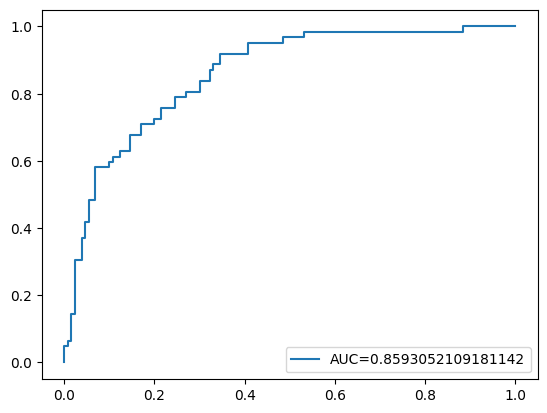

In [15]:
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC={str(auc)}")
plt.legend(loc=4)
plt.show()

### Summary:                                                                                                                                        
1)import libraries                                                                                                                               2)dataset load                                                                                                                               3)data preparation                                                                                                                         4)model create                                                                                                                                5)train the model                                                                                                                         6)predict(with test)                                                                                                                        7)evaluate the model                                                                                                                             8)plot


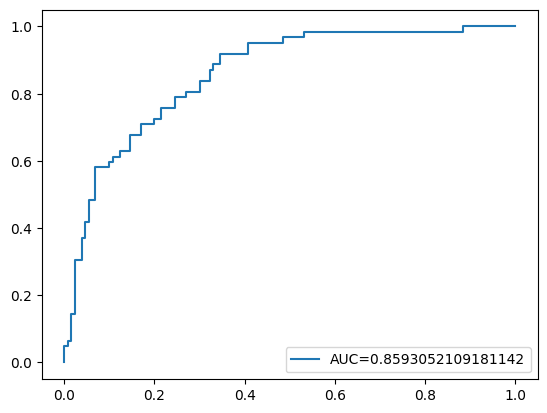

In [16]:
#libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
#dataset load
data = pd.read_csv('C:\\Users\\MuxtorovicH\\Desktop\\diabetes.csv')
#data preparation
x = data.drop('Outcome', axis=1)
y = data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
#model creation
model = LogisticRegression(max_iter=1000)
#model training
model.fit(x_train, y_train)
#predict
y_pred = model.predict(x_test)
#evaluation
accuracy = metrics.accuracy_score(y_test, y_pred)

report = metrics.classification_report(y_test, y_pred)

matrix = metrics.confusion_matrix(y_test, y_pred)

y_pred_proba = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC={str(auc)}")
plt.legend(loc=4)
plt.show()

